In [ ]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
id = '1KwAjU3FluaI1rorAUgupF3epHd1RzAvR'
print(id)

1KwAjU3FluaI1rorAUgupF3epHd1RzAvR


In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

import warnings
warnings.filterwarnings('ignore')

In [ ]:
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('data.csv')
df = pd.read_csv('data.csv')
df.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90189 entries, 0 to 90188
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   userid          90189 non-null  int64 
 1   version         90189 non-null  object
 2   sum_gamerounds  90189 non-null  int64 
 3   retention_1     90189 non-null  bool  
 4   retention_7     90189 non-null  bool  
dtypes: bool(2), int64(2), object(1)
memory usage: 2.2+ MB


## Number of player in each version

In [ ]:
df_version = df.groupby(by=['version'], axis=0, as_index=False)
df_version.agg({'userid':['count']})

,version,userid
,,count
0,gate_30,44700
1,gate_40,45489


## Distribution of gamerounds

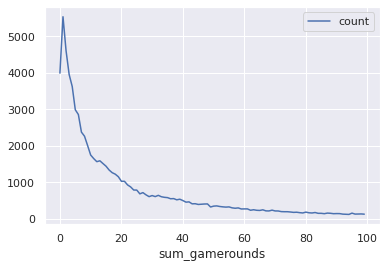

In [ ]:
df_gamerounds = df.groupby(by=['sum_gamerounds'], axis=0, as_index=False).agg({'userid':['count']})

ax = df_gamerounds.head(100).plot(x='sum_gamerounds',y='userid')

# **1-Day Retention Analysis**

## Overall 1-day retention of each version

In [ ]:
df_version['retention_1'].mean()

,version,retention_1
0,gate_30,0.448188
1,gate_40,0.442283


## Bootstrap analysis of 1-day retention

version       gate_30   gate_40
retention_1  0.447203  0.443832
retention_1  0.449102  0.443819
retention_1  0.447896  0.442318
retention_1  0.444068  0.439915
retention_1  0.447666  0.440905


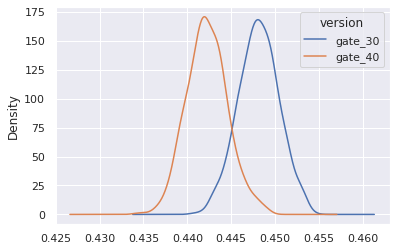

In [ ]:
boot_1d = []
for i in range(1000):
  #boot_mean = df.sample(frac=1, replace=True).groupby(by='version', axis=0, as_index=False)['retention_1'].mean()
  boot_mean = df.sample(frac=1, replace=True).groupby('version')['retention_1'].mean()
  boot_1d.append(boot_mean)

boot_1d = pd.DataFrame(boot_1d)

print(boot_1d.head())

ax = boot_1d.plot(kind='kde')
plt.show()

## % difference in 1-day retention

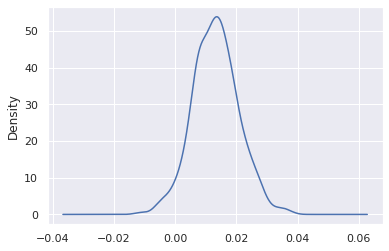

In [ ]:
boot_1d['diff'] = (boot_1d['gate_30']-boot_1d['gate_40']) / boot_1d['gate_40']

ax = boot_1d['diff'].plot(kind='kde')

## Probability of difference

In [ ]:
prob = (boot_1d['diff']>0.0).mean()
print("Probability that gate_30 gives higher 1-day retention : %.2f%%" % (prob*100))

Probability that gate_30 gives higher 1-day retention : 96.50%


# **7-Day Retention Analysis**

In [ ]:
df_version['retention_7'].mean()

,version,retention_7
0,gate_30,0.190201
1,gate_40,0.182000


version       gate_30   gate_40
retention_7  0.188834  0.182998
retention_7  0.191769  0.183084
retention_7  0.187933  0.180355
retention_7  0.192383  0.182404
retention_7  0.190606  0.182018


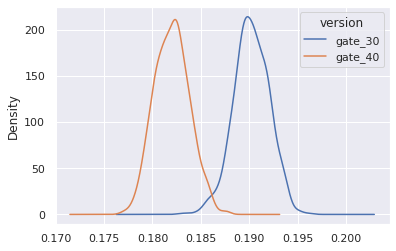

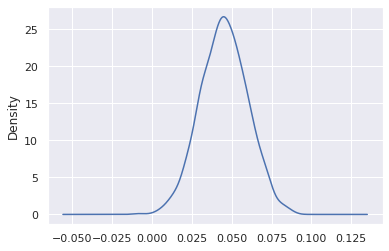

Probability that gate_30 gives higher 7-day retention : 99.90%


In [ ]:
boot_7d = []
for i in range(1000):
  boot_mean = df.sample(frac=1, replace=True).groupby('version')['retention_7'].mean()
  boot_7d.append(boot_mean)

boot_7d = pd.DataFrame(boot_7d)
print(boot_7d.head())

ax = boot_7d.plot(kind='kde')
plt.show()

boot_7d['diff'] = (boot_7d['gate_30']-boot_7d['gate_40']) / boot_7d['gate_40']
ax = boot_7d['diff'].plot(kind='kde')
plt.show()

prob = (boot_7d['diff']>0.0).mean()
print("Probability that gate_30 gives higher 7-day retention : %.2f%%" % (prob*100))